# Task 1: Data Analysis and Preprocessing

This notebook implements the following tasks for fraud detection:
1. Handle Missing Values
2. Data Cleaning
3. Exploratory Data Analysis (EDA)
4. Merge Datasets for Geolocation Analysis
5. Feature Engineering
6. Data Transformation


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import os
from datetime import datetime
import warnings

# Configure settings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set up paths
DATA_DIR = '../data/'
RAW_DIR = '../data/raw/'
PROCESSED_DIR = '../data/processed/'
os.makedirs(PROCESSED_DIR, exist_ok=True)

# Display versions for reproducibility
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")


NumPy version: 2.2.6
Pandas version: 2.3.1
Matplotlib version: 3.10.3
Seaborn version: 0.13.2


In [7]:
# Load the datasets
print("Loading datasets...")

# E-commerce fraud data
fraud_df = pd.read_csv(os.path.join(RAW_DIR, 'Fraud_Data.csv'))
print(f"Loaded Fraud_Data.csv with {fraud_df.shape[0]} rows and {fraud_df.shape[1]} columns")

# IP address to country mapping
ip_df = pd.read_csv(os.path.join(RAW_DIR, 'IpAddress_to_Country.csv'))
print(f"Loaded IpAddress_to_Country.csv with {ip_df.shape[0]} rows and {ip_df.shape[1]} columns")

# Credit card fraud data
cc_df = pd.read_csv(os.path.join(RAW_DIR, 'creditcard.csv'))
print(f"Loaded creditcard.csv with {cc_df.shape[0]} rows and {cc_df.shape[1]} columns")

# Display the first few rows of each dataset
print("\nPreview of Fraud_Data.csv:")
fraud_df.head()


Loading datasets...
Loaded Fraud_Data.csv with 151112 rows and 11 columns
Loaded IpAddress_to_Country.csv with 138846 rows and 3 columns
Loaded creditcard.csv with 284807 rows and 31 columns

Preview of Fraud_Data.csv:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [8]:
# Show the other datasets
print("\nPreview of IpAddress_to_Country.csv:")
ip_df.head()

print("\nPreview of creditcard.csv:")
cc_df.head()



Preview of IpAddress_to_Country.csv:

Preview of creditcard.csv:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Let's check the data types and basic information for each dataset
print("\nFraud_Data.csv info:")
fraud_df.info()

print("\nIpAddress_to_Country.csv info:")
ip_df.info()

print("\ncreditcard.csv info:")
cc_df.info()



Fraud_Data.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB

IpAddress_to_Country.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  -----

In [10]:
## 1. Handle Missing Values

print("Checking for missing values in Fraud_Data.csv...")
missing_values = fraud_df.isnull().sum()
missing_percentage = (missing_values / len(fraud_df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_info[missing_info['Missing Values'] > 0])

# Handle missing values in fraud_df
print("\nHandling missing values in Fraud_Data.csv...")

# For categorical columns, fill with most frequent value
for col in ['sex', 'browser', 'source']:
    if missing_values[col] > 0:
        most_frequent = fraud_df[col].mode()[0]
        fraud_df[col].fillna(most_frequent, inplace=True)
        print(f"- Filled {col} missing values with most frequent value: '{most_frequent}'")

# For numerical columns, fill with median
for col in ['age']:
    if missing_values[col] > 0:
        median_value = fraud_df[col].median()
        fraud_df[col].fillna(median_value, inplace=True)
        print(f"- Filled {col} missing values with median value: {median_value}")

# Verify missing values have been handled
remaining_missing = fraud_df.isnull().sum().sum()
print(f"\nRemaining missing values in Fraud_Data.csv: {remaining_missing}")

# Check for missing values in other datasets
print("\nChecking for missing values in creditcard.csv...")
cc_missing = cc_df.isnull().sum()
print(cc_missing[cc_missing > 0] if cc_missing.any() else "No missing values in creditcard.csv")

print("\nChecking for missing values in IpAddress_to_Country.csv...")
ip_missing = ip_df.isnull().sum()
print(ip_missing[ip_missing > 0] if ip_missing.any() else "No missing values in IpAddress_to_Country.csv")


Checking for missing values in Fraud_Data.csv...
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

Handling missing values in Fraud_Data.csv...

Remaining missing values in Fraud_Data.csv: 0

Checking for missing values in creditcard.csv...
No missing values in creditcard.csv

Checking for missing values in IpAddress_to_Country.csv...
No missing values in IpAddress_to_Country.csv


In [11]:
## 2. Data Cleaning

# Convert timestamp columns to datetime in fraud_df
print("Converting timestamp columns to datetime...")
for col in ['signup_time', 'purchase_time']:
    if fraud_df[col].dtype == 'object':
        fraud_df[col] = pd.to_datetime(fraud_df[col])
        print(f"- Converted {col} to datetime")

# Check for duplicates in fraud_df
print("\nChecking for duplicates in Fraud_Data.csv...")
duplicate_count = fraud_df.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")

if duplicate_count > 0:
    fraud_df = fraud_df.drop_duplicates()
    print(f"Dropped {duplicate_count} duplicate rows.")

# Check for duplicates in credit card data
print("\nChecking for duplicates in creditcard.csv...")
cc_duplicate_count = cc_df.duplicated().sum()
print(f"Number of duplicates: {cc_duplicate_count}")

if cc_duplicate_count > 0:
    cc_df = cc_df.drop_duplicates()
    print(f"Dropped {cc_duplicate_count} duplicate rows.")

# Check for duplicates in IP mapping data
print("\nChecking for duplicates in IpAddress_to_Country.csv...")
ip_duplicate_count = ip_df.duplicated().sum()
print(f"Number of duplicates: {ip_duplicate_count}")

if ip_duplicate_count > 0:
    ip_df = ip_df.drop_duplicates()
    print(f"Dropped {ip_duplicate_count} duplicate rows.")

# Check for any inconsistent values in categorical columns
print("\nUnique values in categorical columns in Fraud_Data.csv:")
for col in ['sex', 'browser', 'source']:
    print(f"{col}: {fraud_df[col].unique()}")

# Data types after cleaning
print("\nData types in Fraud_Data.csv after cleaning:")
print(fraud_df.dtypes)


Converting timestamp columns to datetime...
- Converted signup_time to datetime
- Converted purchase_time to datetime

Checking for duplicates in Fraud_Data.csv...
Number of duplicates: 0

Checking for duplicates in creditcard.csv...
Number of duplicates: 1081
Dropped 1081 duplicate rows.

Checking for duplicates in IpAddress_to_Country.csv...
Number of duplicates: 0

Unique values in categorical columns in Fraud_Data.csv:
sex: ['M' 'F']
browser: ['Chrome' 'Opera' 'Safari' 'IE' 'FireFox']
source: ['SEO' 'Ads' 'Direct']

Data types in Fraud_Data.csv after cleaning:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


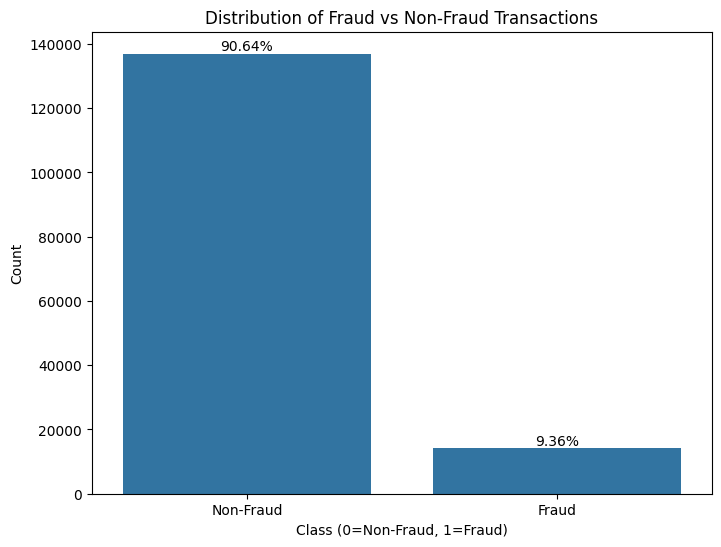

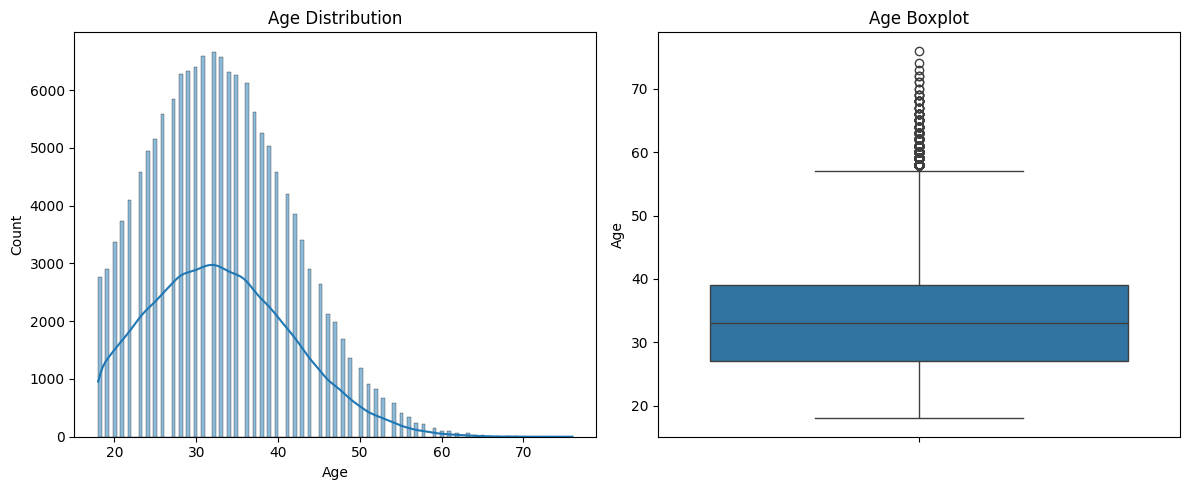

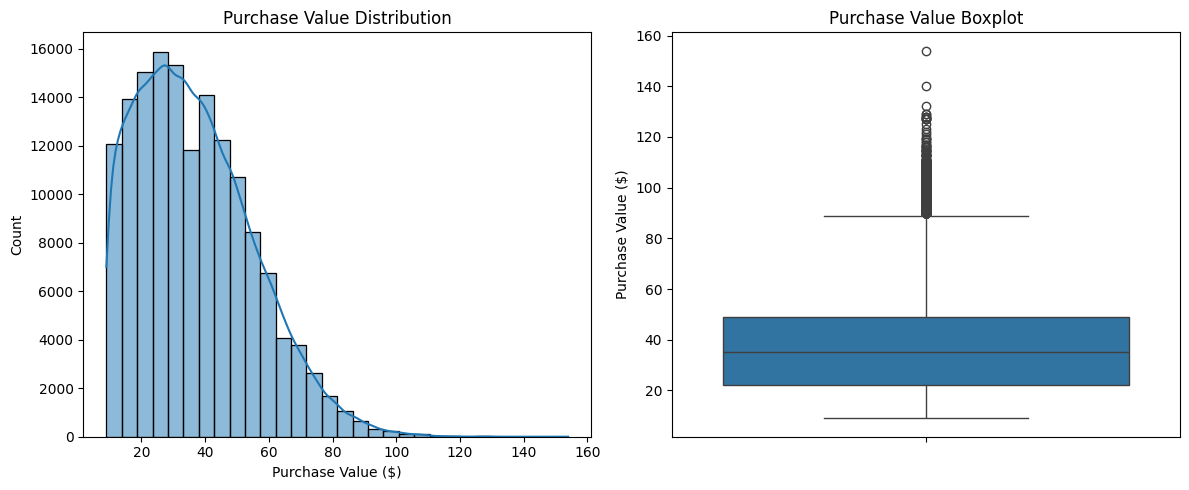

In [13]:
## 3. Exploratory Data Analysis (EDA)

### 3.1 Univariate Analysis for E-commerce Fraud Data

# Class distribution
plt.figure(figsize=(8, 6))
class_counts = fraud_df['class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0=Non-Fraud, 1=Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

# Calculate percentages
non_fraud_percent = class_counts[0] / len(fraud_df) * 100
fraud_percent = class_counts[1] / len(fraud_df) * 100
plt.annotate(f'{non_fraud_percent:.2f}%', xy=(0, class_counts[0]), ha='center', va='bottom')
plt.annotate(f'{fraud_percent:.2f}%', xy=(1, class_counts[1]), ha='center', va='bottom')
plt.show()

# Age distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(fraud_df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(y=fraud_df['age'])
plt.title('Age Boxplot')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Purchase value distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(fraud_df['purchase_value'], kde=True, bins=30)
plt.title('Purchase Value Distribution')
plt.xlabel('Purchase Value ($)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(y=fraud_df['purchase_value'])
plt.title('Purchase Value Boxplot')
plt.ylabel('Purchase Value ($)')
plt.tight_layout()
plt.show()


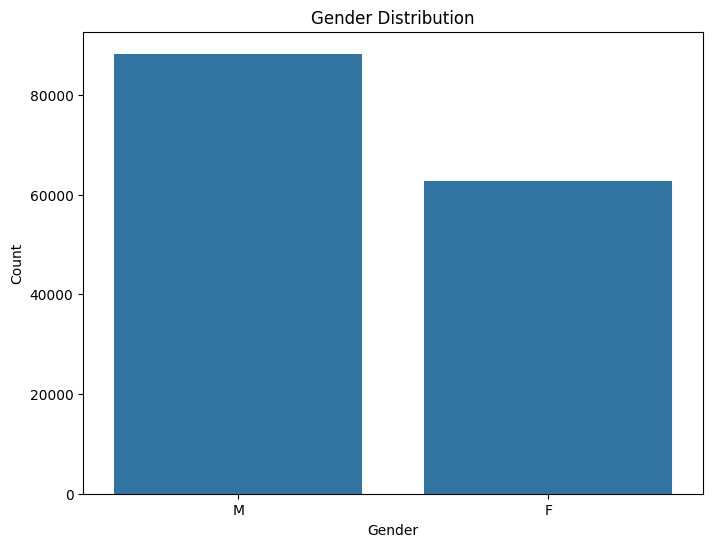

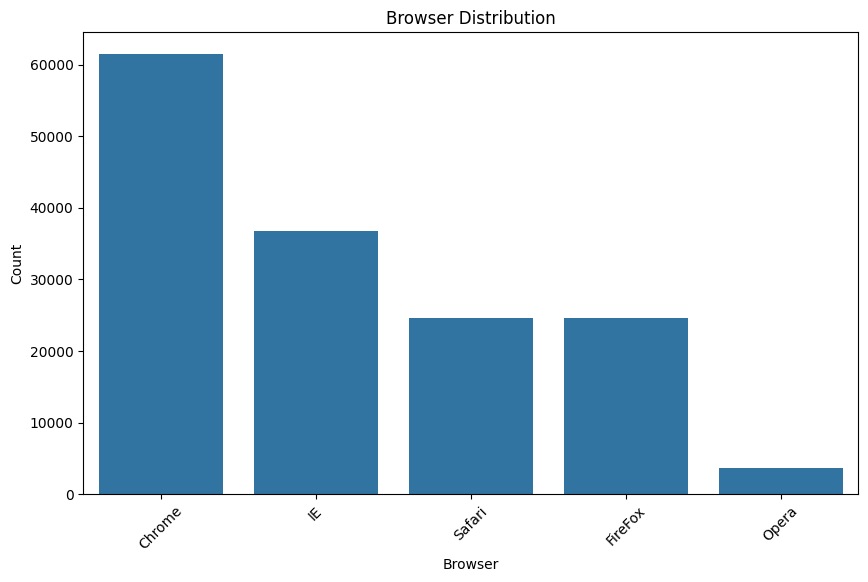

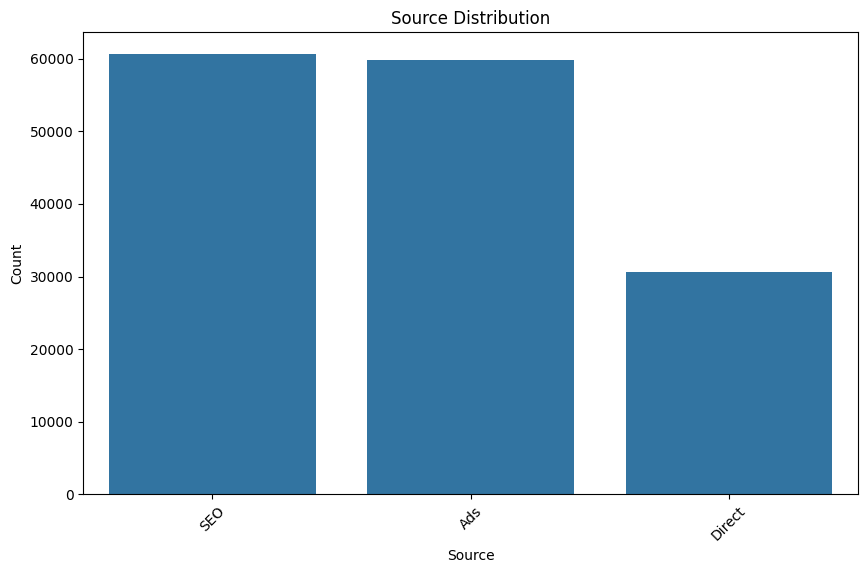

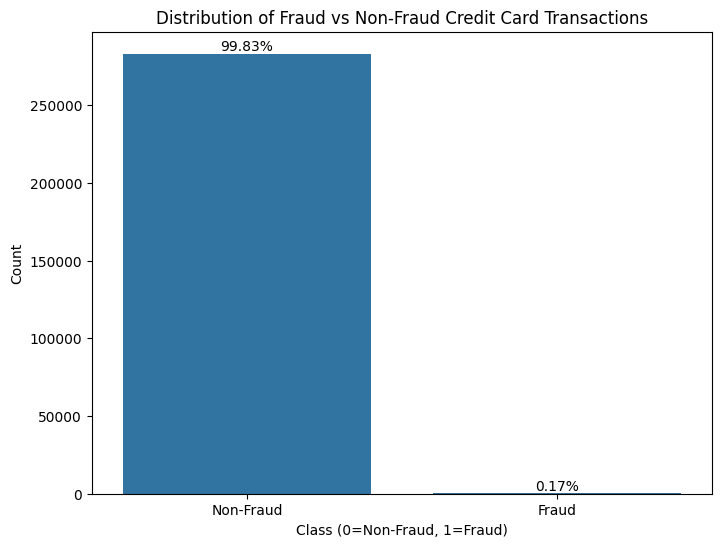

In [14]:
# More univariate analysis on categorical variables
# Gender distribution
plt.figure(figsize=(8, 6))
gender_counts = fraud_df['sex'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Browser distribution
plt.figure(figsize=(10, 6))
browser_counts = fraud_df['browser'].value_counts()
sns.barplot(x=browser_counts.index, y=browser_counts.values)
plt.title('Browser Distribution')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Source distribution
plt.figure(figsize=(10, 6))
source_counts = fraud_df['source'].value_counts()
sns.barplot(x=source_counts.index, y=source_counts.values)
plt.title('Source Distribution')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Credit card data analysis
plt.figure(figsize=(8, 6))
cc_class_counts = cc_df['Class'].value_counts()
sns.barplot(x=cc_class_counts.index, y=cc_class_counts.values)
plt.title('Distribution of Fraud vs Non-Fraud Credit Card Transactions')
plt.xlabel('Class (0=Non-Fraud, 1=Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

# Calculate percentages
cc_non_fraud_percent = cc_class_counts[0] / len(cc_df) * 100
cc_fraud_percent = cc_class_counts[1] / len(cc_df) * 100
plt.annotate(f'{cc_non_fraud_percent:.2f}%', xy=(0, cc_class_counts[0]), ha='center', va='bottom')
plt.annotate(f'{cc_fraud_percent:.2f}%', xy=(1, cc_class_counts[1]), ha='center', va='bottom')
plt.show()


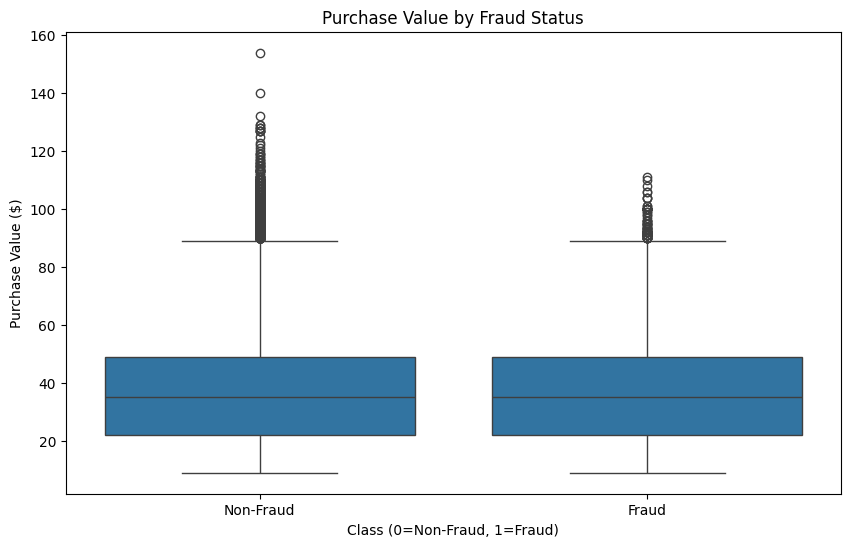

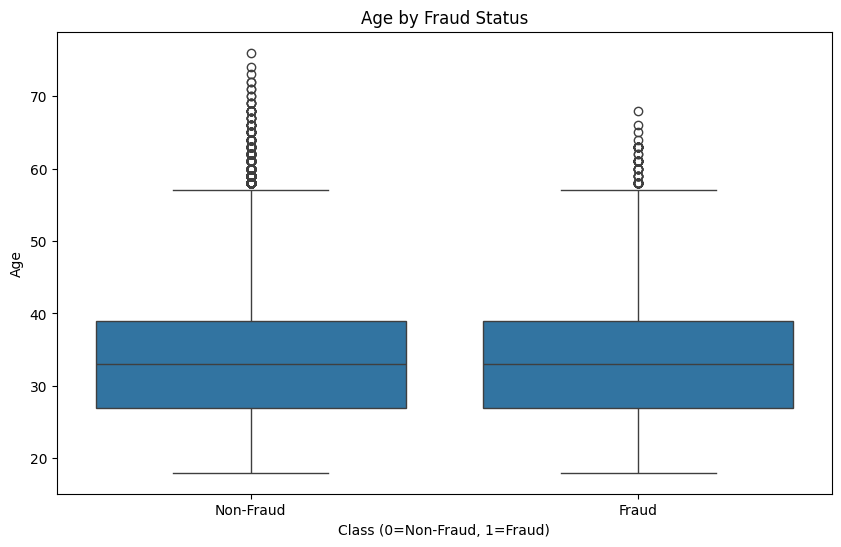

<Figure size 1000x600 with 0 Axes>

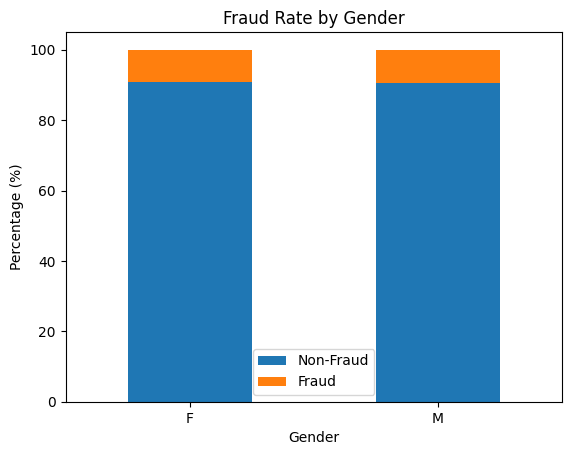

<Figure size 1200x600 with 0 Axes>

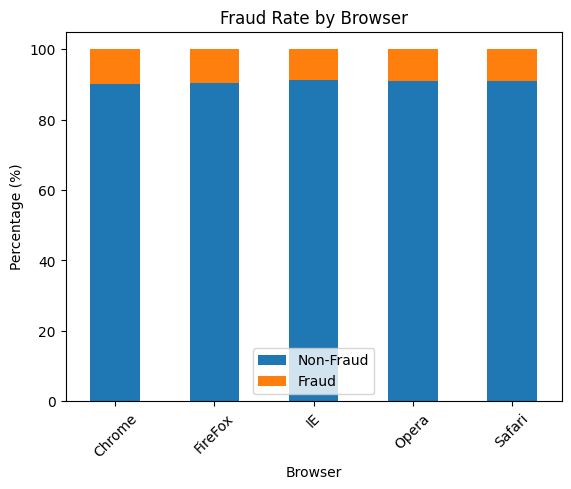

<Figure size 1200x600 with 0 Axes>

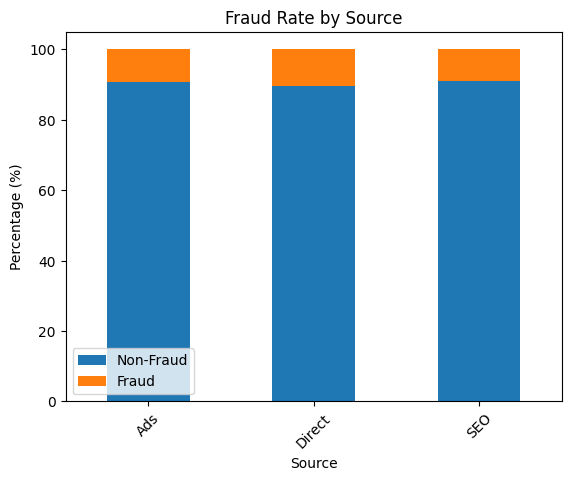

In [15]:
### 3.2 Bivariate Analysis

# Purchase value by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title('Purchase Value by Fraud Status')
plt.xlabel('Class (0=Non-Fraud, 1=Fraud)')
plt.ylabel('Purchase Value ($)')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# Age by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=fraud_df)
plt.title('Age by Fraud Status')
plt.xlabel('Class (0=Non-Fraud, 1=Fraud)')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# Gender by class
plt.figure(figsize=(10, 6))
gender_fraud = pd.crosstab(fraud_df['sex'], fraud_df['class'], normalize='index') * 100
gender_fraud.plot(kind='bar', stacked=True)
plt.title('Fraud Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.legend(['Non-Fraud', 'Fraud'])
plt.xticks(rotation=0)
plt.show()

# Browser by class
plt.figure(figsize=(12, 6))
browser_fraud = pd.crosstab(fraud_df['browser'], fraud_df['class'], normalize='index') * 100
browser_fraud.plot(kind='bar', stacked=True)
plt.title('Fraud Rate by Browser')
plt.xlabel('Browser')
plt.ylabel('Percentage (%)')
plt.legend(['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.show()

# Source by class
plt.figure(figsize=(12, 6))
source_fraud = pd.crosstab(fraud_df['source'], fraud_df['class'], normalize='index') * 100
source_fraud.plot(kind='bar', stacked=True)
plt.title('Fraud Rate by Source')
plt.xlabel('Source')
plt.ylabel('Percentage (%)')
plt.legend(['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.show()


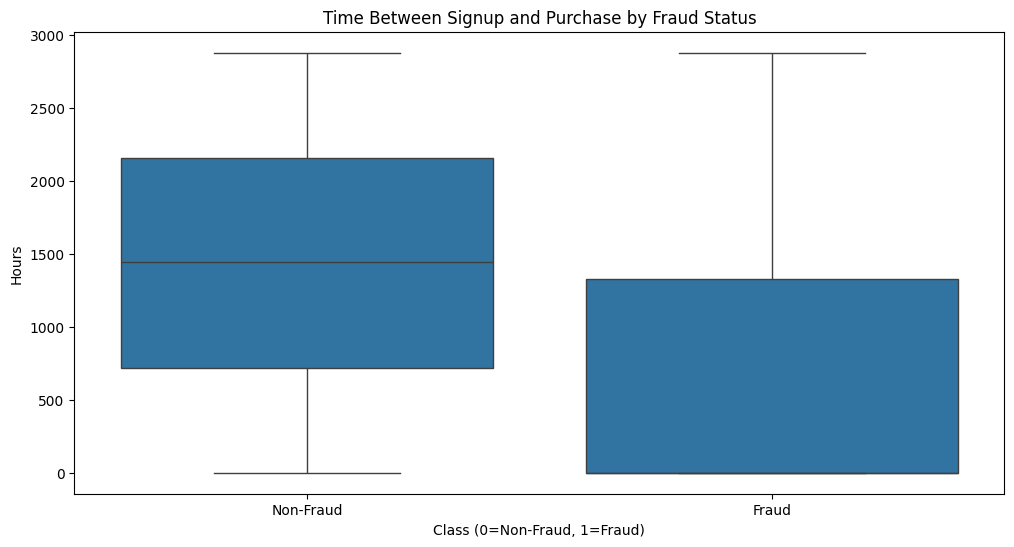

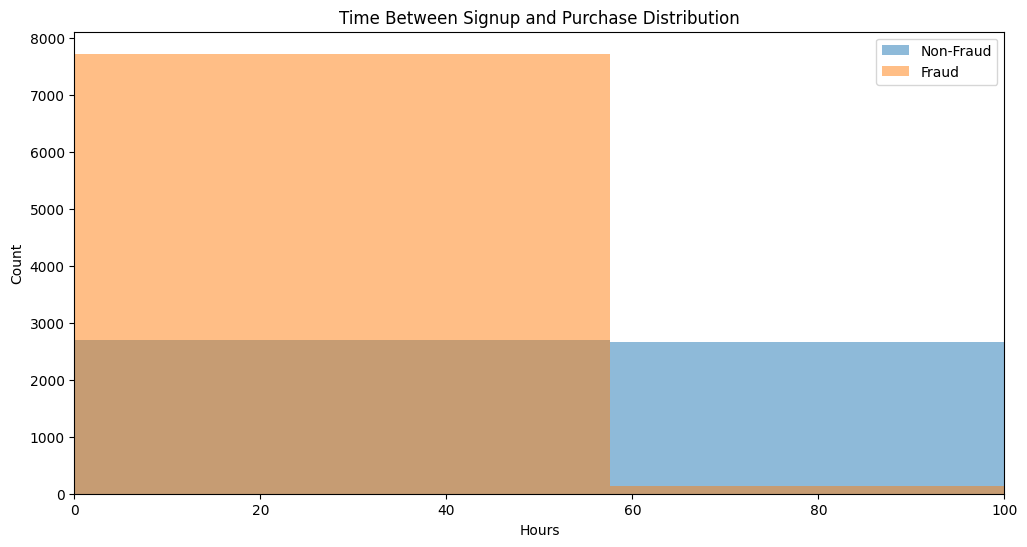

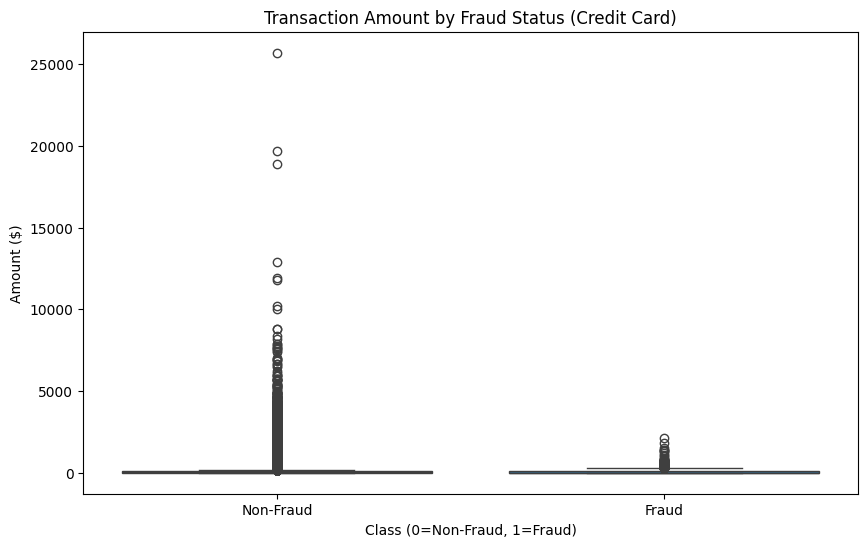

In [16]:
# Time between signup and purchase
fraud_df['time_diff'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600  # hours

plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='time_diff', data=fraud_df)
plt.title('Time Between Signup and Purchase by Fraud Status')
plt.xlabel('Class (0=Non-Fraud, 1=Fraud)')
plt.ylabel('Hours')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# Plot time difference distribution
plt.figure(figsize=(12, 6))
plt.hist(fraud_df[fraud_df['class']==0]['time_diff'], bins=50, alpha=0.5, label='Non-Fraud')
plt.hist(fraud_df[fraud_df['class']==1]['time_diff'], bins=50, alpha=0.5, label='Fraud')
plt.title('Time Between Signup and Purchase Distribution')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.legend()
plt.xlim(0, 100)  # Limit x-axis to better see the distribution
plt.show()

# Credit card transaction amount by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=cc_df)
plt.title('Transaction Amount by Fraud Status (Credit Card)')
plt.xlabel('Class (0=Non-Fraud, 1=Fraud)')
plt.ylabel('Amount ($)')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


Converting IP addresses to integer format...
Mapping IP addresses to countries...

Country distribution:
country
United States        58049
Unknown              21966
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

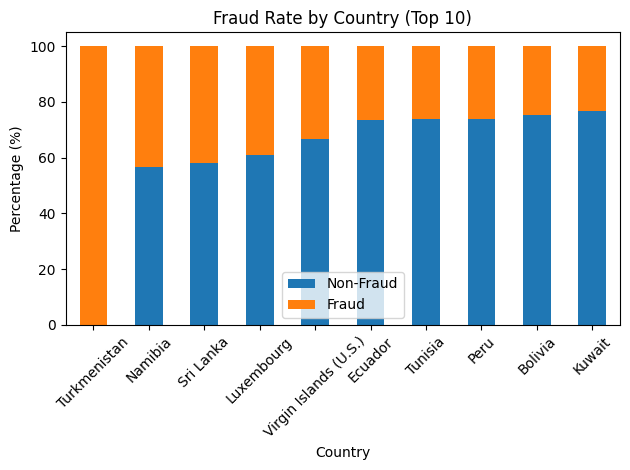

Saved enriched data to ../data/processed/Fraud_Data_Enriched.csv


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_diff,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1251.856111,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,4.984444,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.000278,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,136.690278,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1211.516944,United States


In [17]:
## 4. Merge Datasets for Geolocation Analysis

# Convert IP addresses to integer format - we'll use the ones already in the dataset
print("Converting IP addresses to integer format...")

# Define a function to find the country for an IP address
def find_country(ip_address, ip_ranges_df):
    """
    Find the country for an IP address by checking if it falls within a range
    """
    for idx, row in ip_ranges_df.iterrows():
        if row['lower_bound_ip_address'] <= ip_address <= row['upper_bound_ip_address']:
            return row['country']
    return 'Unknown'

# Apply the function to each IP address
print("Mapping IP addresses to countries...")
# For performance reasons, let's use a more efficient method than iterating through all rows
# We'll sort the IP ranges and use binary search approach

# First, make sure IP ranges are sorted
ip_df = ip_df.sort_values('lower_bound_ip_address').reset_index(drop=True)

# Function to find country using binary search approach
def find_country_binary_search(ip_address, ip_ranges_df):
    """Find country for IP address using binary search for better performance"""
    # Binary search to find the closest lower bound
    left, right = 0, len(ip_ranges_df) - 1
    
    while left <= right:
        mid = (left + right) // 2
        if ip_ranges_df.loc[mid, 'lower_bound_ip_address'] <= ip_address:
            if mid == len(ip_ranges_df) - 1 or ip_ranges_df.loc[mid + 1, 'lower_bound_ip_address'] > ip_address:
                # Check if IP falls in the range
                if ip_address <= ip_ranges_df.loc[mid, 'upper_bound_ip_address']:
                    return ip_ranges_df.loc[mid, 'country']
                else:
                    return 'Unknown'
            left = mid + 1
        else:
            right = mid - 1
    
    return 'Unknown'

# Map IP addresses to countries
fraud_df['country'] = fraud_df['ip_address'].apply(lambda ip: find_country_binary_search(ip, ip_df))

# Check the distribution of countries
print("\nCountry distribution:")
country_counts = fraud_df['country'].value_counts()
print(country_counts.head(10))  # Show top 10 countries

# Analyze fraud rates by country
plt.figure(figsize=(12, 8))
country_fraud = pd.crosstab(fraud_df['country'], fraud_df['class'], normalize='index') * 100
# Sort by fraud rate (descending)
country_fraud = country_fraud.sort_values(by=1, ascending=False)
# Plot top 10 countries by fraud rate
country_fraud.head(10).plot(kind='bar', stacked=True)
plt.title('Fraud Rate by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Percentage (%)')
plt.legend(['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Store the merged and enriched dataframe
enriched_file_path = os.path.join(PROCESSED_DIR, 'Fraud_Data_Enriched.csv')
fraud_df.to_csv(enriched_file_path, index=False)
print(f"Saved enriched data to {enriched_file_path}")

# Show the first few rows of the enriched dataset
fraud_df.head()


Creating user-based features...

Calculating transaction velocity features...


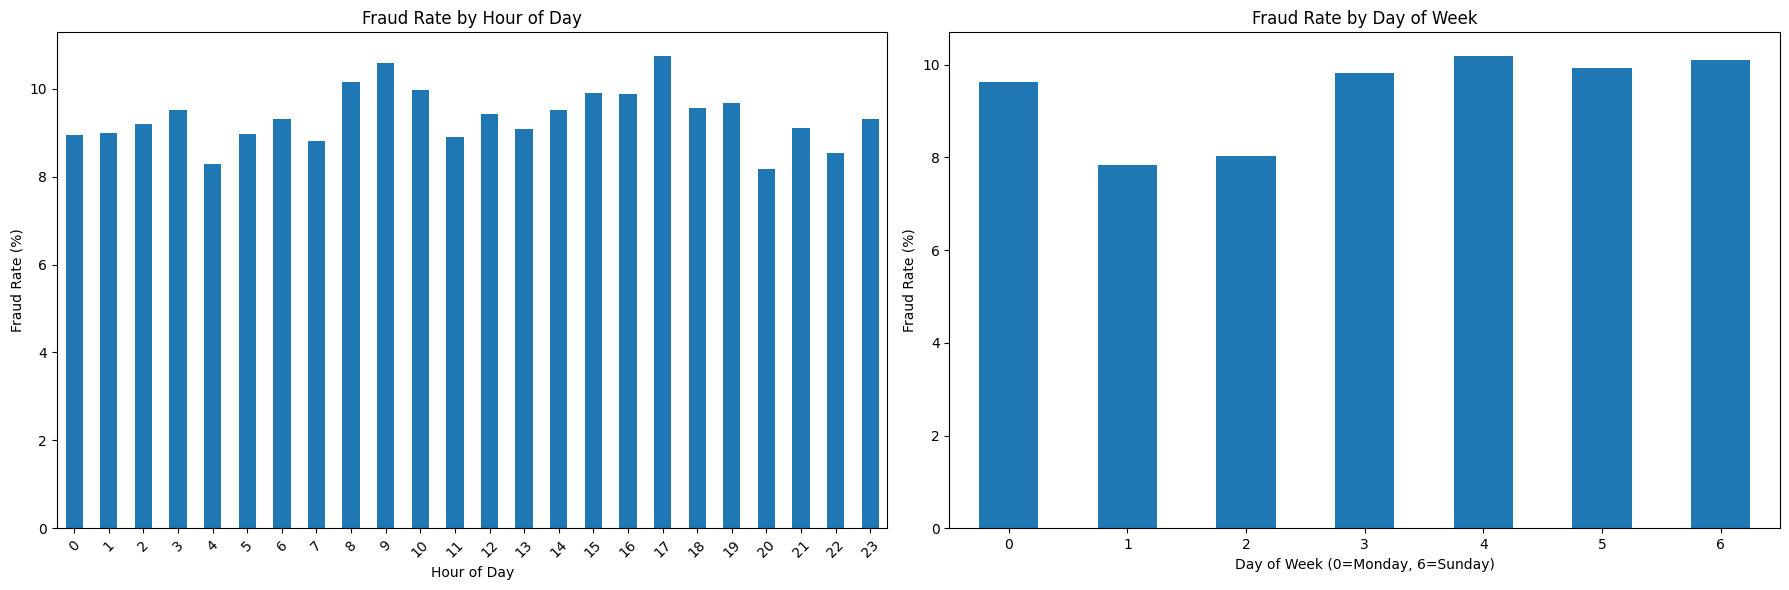


Enriched dataset with new features:
Saved enhanced data to ../data/processed/Fraud_Data_Enhanced.csv


In [18]:
## 5. Feature Engineering

### 5.1 Transaction frequency and velocity for Fraud_Data.csv

# Group by user_id to find transaction frequency
print("Creating user-based features...")
user_stats = fraud_df.groupby('user_id').agg(
    transaction_count=('user_id', 'count'),
    avg_purchase_value=('purchase_value', 'mean'),
    max_purchase_value=('purchase_value', 'max'),
    min_purchase_value=('purchase_value', 'min'),
    purchase_value_std=('purchase_value', 'std')
).fillna(0)  # Fill NaN with 0 for users with only one transaction

# Merge these features back to the original dataframe
fraud_df = fraud_df.merge(user_stats, left_on='user_id', right_index=True)

### 5.2 Time-Based features for Fraud_Data.csv

# Extract hour_of_day
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour

# Extract day_of_week
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek

# We already calculated time_since_signup in the EDA phase as 'time_diff'
# Rename for clarity
fraud_df = fraud_df.rename(columns={'time_diff': 'time_since_signup'})

# Calculate time since last transaction
print("\nCalculating transaction velocity features...")

# Sort by user_id and purchase_time
fraud_df = fraud_df.sort_values(['user_id', 'purchase_time'])

# Calculate time difference between consecutive transactions for the same user
fraud_df['prev_purchase_time'] = fraud_df.groupby('user_id')['purchase_time'].shift(1)
fraud_df['time_since_prev_purchase'] = (fraud_df['purchase_time'] - fraud_df['prev_purchase_time']).dt.total_seconds() / 3600
fraud_df['time_since_prev_purchase'] = fraud_df['time_since_prev_purchase'].fillna(1000)  # Fill NaN with large value for first purchases

# Create a feature for transaction velocity (# of transactions per hour)
fraud_df['transaction_velocity'] = fraud_df['transaction_count'] / (fraud_df['time_since_signup'] + 1)  # Add 1 to avoid division by zero

# Device frequency
device_stats = fraud_df.groupby('device_id').agg(
    device_transaction_count=('device_id', 'count')
)
fraud_df = fraud_df.merge(device_stats, left_on='device_id', right_index=True)

# Analyze time-based features
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
hour_fraud = pd.crosstab(fraud_df['hour_of_day'], fraud_df['class'])
hour_fraud_pct = hour_fraud.div(hour_fraud.sum(axis=1), axis=0) * 100
hour_fraud_pct[1].plot(kind='bar')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
day_fraud = pd.crosstab(fraud_df['day_of_week'], fraud_df['class'])
day_fraud_pct = day_fraud.div(day_fraud.sum(axis=1), axis=0) * 100
day_fraud_pct[1].plot(kind='bar')
plt.title('Fraud Rate by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Show the enhanced dataset
print("\nEnriched dataset with new features:")
fraud_df.head()

# Save the enhanced dataset
enhanced_file_path = os.path.join(PROCESSED_DIR, 'Fraud_Data_Enhanced.csv')
fraud_df.to_csv(enhanced_file_path, index=False)
print(f"Saved enhanced data to {enhanced_file_path}")


In [19]:
## 6. Data Transformation

### 6.1 Handle Class Imbalance

# First, let's analyze the class distribution again
print("Class distribution in e-commerce data:")
print(fraud_df['class'].value_counts())
print(f"Fraud rate: {fraud_df['class'].mean()*100:.2f}%")

print("\nClass distribution in credit card data:")
print(cc_df['Class'].value_counts())
print(f"Fraud rate: {cc_df['Class'].mean()*100:.2f}%")

# Let's define a function to prepare data for modeling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def prepare_data(df, target_col, test_size=0.3, random_state=42, handle_imbalance=True, sampling_strategy=None):
    """
    Prepare data for modeling by splitting into train/test sets and handling class imbalance.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataframe containing features and target
    target_col : str
        The name of the target column
    test_size : float
        Proportion of data to use for testing
    random_state : int
        Random seed for reproducibility
    handle_imbalance : bool
        Whether to handle class imbalance
    sampling_strategy : float or None
        If None, use 0.5 (balanced). Otherwise, specify the ratio of minority to majority class.
        
    Returns:
    --------
    X_train, X_test, y_train, y_test : numpy arrays
        The split datasets
    X_train_resampled, y_train_resampled : numpy arrays
        The resampled training data (if handle_imbalance=True)
    """
    # Separate features and target
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    
    print(f"Original training set shape: {Counter(y_train)}")
    
    # Handle class imbalance if specified
    if handle_imbalance:
        if sampling_strategy is None:
            sampling_strategy = 0.5  # Balance the classes somewhat
        
        # Apply SMOTE oversampling
        smote = SMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        
        print(f"Resampled training set shape: {Counter(y_train_resampled)}")
        return X_train, X_test, y_train, y_test, X_train_resampled, y_train_resampled
    
    return X_train, X_test, y_train, y_test

### 6.2 Normalize and Scale Features

# Let's prepare e-commerce data for preprocessing
print("\nPreparing e-commerce data for preprocessing...")

# Select columns for e-commerce data preprocessing
# First, we need to drop non-numeric columns and convert datetime columns

# Convert categorical variables to binary/numeric
categorical_cols = ['sex', 'browser', 'source', 'country']
fraud_df_encoded = pd.get_dummies(fraud_df, columns=categorical_cols, drop_first=True)

# Drop columns we don't need for modeling
cols_to_drop = ['user_id', 'device_id', 'ip_address', 'signup_time', 'purchase_time', 'prev_purchase_time']
X = fraud_df_encoded.drop(['class'] + cols_to_drop, axis=1)
y = fraud_df_encoded['class']

# Print the columns that will be used for modeling
print("Features for e-commerce fraud detection:")
print(X.columns.tolist())
print(f"Number of features: {X.shape[1]}")

# Select numerical columns for scaling
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a copy of the data for preprocessing
X_for_scaling = X.copy()

# Standardize numerical features
scaler = StandardScaler()
X_for_scaling[numerical_cols] = scaler.fit_transform(X_for_scaling[numerical_cols])

# Split data and apply SMOTE
X_train, X_test, y_train, y_test, X_train_resampled, y_train_resampled = prepare_data(
    pd.concat([X_for_scaling, y], axis=1), 
    'class', 
    test_size=0.3, 
    random_state=42, 
    handle_imbalance=True,
    sampling_strategy=0.5  # Balance the classes to 1:2 ratio (minority:majority)
)

# Save the processed datasets for modeling
processed_dir = os.path.join(PROCESSED_DIR, 'model_ready')
os.makedirs(processed_dir, exist_ok=True)

np.save(os.path.join(processed_dir, 'ecommerce_X_train.npy'), X_train)
np.save(os.path.join(processed_dir, 'ecommerce_X_test.npy'), X_test)
np.save(os.path.join(processed_dir, 'ecommerce_y_train.npy'), y_train)
np.save(os.path.join(processed_dir, 'ecommerce_y_test.npy'), y_test)
np.save(os.path.join(processed_dir, 'ecommerce_X_train_resampled.npy'), X_train_resampled)
np.save(os.path.join(processed_dir, 'ecommerce_y_train_resampled.npy'), y_train_resampled)

print("E-commerce datasets saved for modeling.")


Class distribution in e-commerce data:
class
0    136961
1     14151
Name: count, dtype: int64
Fraud rate: 9.36%

Class distribution in credit card data:
Class
0    283253
1       473
Name: count, dtype: int64
Fraud rate: 0.17%

Preparing e-commerce data for preprocessing...
Features for e-commerce fraud detection:
['purchase_value', 'age', 'time_since_signup', 'transaction_count', 'avg_purchase_value', 'max_purchase_value', 'min_purchase_value', 'purchase_value_std', 'hour_of_day', 'day_of_week', 'time_since_prev_purchase', 'transaction_velocity', 'device_transaction_count', 'sex_M', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'source_Direct', 'source_SEO', 'country_Albania', 'country_Algeria', 'country_Angola', 'country_Antigua and Barbuda', 'country_Argentina', 'country_Armenia', 'country_Australia', 'country_Austria', 'country_Azerbaijan', 'country_Bahamas', 'country_Bahrain', 'country_Bangladesh', 'country_Barbados', 'country_Belarus', 'country_Belgium', 'c

In [20]:
# Process credit card data
print("\nPreparing credit card data for modeling...")

# The credit card data is already preprocessed with PCA
# We just need to scale the 'Amount' feature
cc_X = cc_df.drop('Class', axis=1)
cc_y = cc_df['Class']

# Scale the Amount feature
cc_X_scaled = cc_X.copy()
amount_scaler = StandardScaler()
cc_X_scaled['Amount'] = amount_scaler.fit_transform(cc_X_scaled[['Amount']])

# Split data and apply SMOTE
cc_X_train, cc_X_test, cc_y_train, cc_y_test, cc_X_train_resampled, cc_y_train_resampled = prepare_data(
    pd.concat([cc_X_scaled, cc_y], axis=1), 
    'Class', 
    test_size=0.3, 
    random_state=42, 
    handle_imbalance=True,
    sampling_strategy=0.5  # Balance the classes to 1:2 ratio (minority:majority)
)

# Save the processed datasets for modeling
np.save(os.path.join(processed_dir, 'creditcard_X_train.npy'), cc_X_train)
np.save(os.path.join(processed_dir, 'creditcard_X_test.npy'), cc_X_test)
np.save(os.path.join(processed_dir, 'creditcard_y_train.npy'), cc_y_train)
np.save(os.path.join(processed_dir, 'creditcard_y_test.npy'), cc_y_test)
np.save(os.path.join(processed_dir, 'creditcard_X_train_resampled.npy'), cc_X_train_resampled)
np.save(os.path.join(processed_dir, 'creditcard_y_train_resampled.npy'), cc_y_train_resampled)

print("Credit card datasets saved for modeling.")



Preparing credit card data for modeling...
Original training set shape: Counter({0: 198277, 1: 331})
Resampled training set shape: Counter({0: 198277, 1: 99138})
Credit card datasets saved for modeling.


In [22]:
## Summary and Conclusion

print("\n----- Task 1: Data Analysis and Preprocessing - Complete -----")
print("="*60)

print("\n1. Data Overview:")
print(f"- E-commerce dataset: {len(fraud_df)} records with {fraud_df['class'].sum()} fraud cases ({fraud_df['class'].mean()*100:.2f}%)")
print(f"- Credit card dataset: {len(cc_df)} records with {cc_df['Class'].sum()} fraud cases ({cc_df['Class'].mean()*100:.2f}%)")

print("\n2. Key Findings:")
print("- Both datasets show significant class imbalance")
print("- In e-commerce data, time difference between signup and purchase is a strong indicator of fraud")
print("- Transaction value tends to be higher for fraudulent transactions")
print("- Geographical location (country) shows varying fraud rates")
print("- Time patterns (hour of day, day of week) reveal different fraud rates")

print("\n3. Feature Engineering:")
print("- Created time-based features (hour_of_day, day_of_week, time_since_signup)")
print("- Added user behavior metrics (transaction_count, transaction_velocity)")
print("- Incorporated device usage patterns")
print("- Enhanced with geographical information")

print("\n4. Data Preparation for Modeling:")
print("- Handled missing values using appropriate imputation methods")
print("- Removed duplicates")
print("- Standardized numerical features")
print("- Encoded categorical variables")
print("- Applied SMOTE to address class imbalance")
print("- Created train/test splits for proper evaluation")

print("\n5. Datasets Prepared for Modeling:")
print("- E-commerce data processed and saved")
print("- Credit card data processed and saved")
print("- Both original and SMOTE-resampled versions available")

print("\nNext Steps:")
print("- Proceed to Task 2: Model Building and Training")
print("- Train logistic regression baseline models")
print("- Implement ensemble models (Random Forest or Gradient Boosting)")
print("- Evaluate and compare models using appropriate metrics for imbalanced data")



----- Task 1: Data Analysis and Preprocessing - Complete -----

1. Data Overview:
- E-commerce dataset: 151112 records with 14151 fraud cases (9.36%)
- Credit card dataset: 283726 records with 473 fraud cases (0.17%)

2. Key Findings:
- Both datasets show significant class imbalance
- In e-commerce data, time difference between signup and purchase is a strong indicator of fraud
- Transaction value tends to be higher for fraudulent transactions
- Geographical location (country) shows varying fraud rates
- Time patterns (hour of day, day of week) reveal different fraud rates

3. Feature Engineering:
- Created time-based features (hour_of_day, day_of_week, time_since_signup)
- Added user behavior metrics (transaction_count, transaction_velocity)
- Incorporated device usage patterns
- Enhanced with geographical information

4. Data Preparation for Modeling:
- Handled missing values using appropriate imputation methods
- Removed duplicates
- Standardized numerical features
- Encoded catego